# LLM Output Evaluation (Intro) - Notebook  

#### In this Jupyter notebook, you will find essential evaluation metrics for AI output, covering both labeling (classification) and text generation tasks.


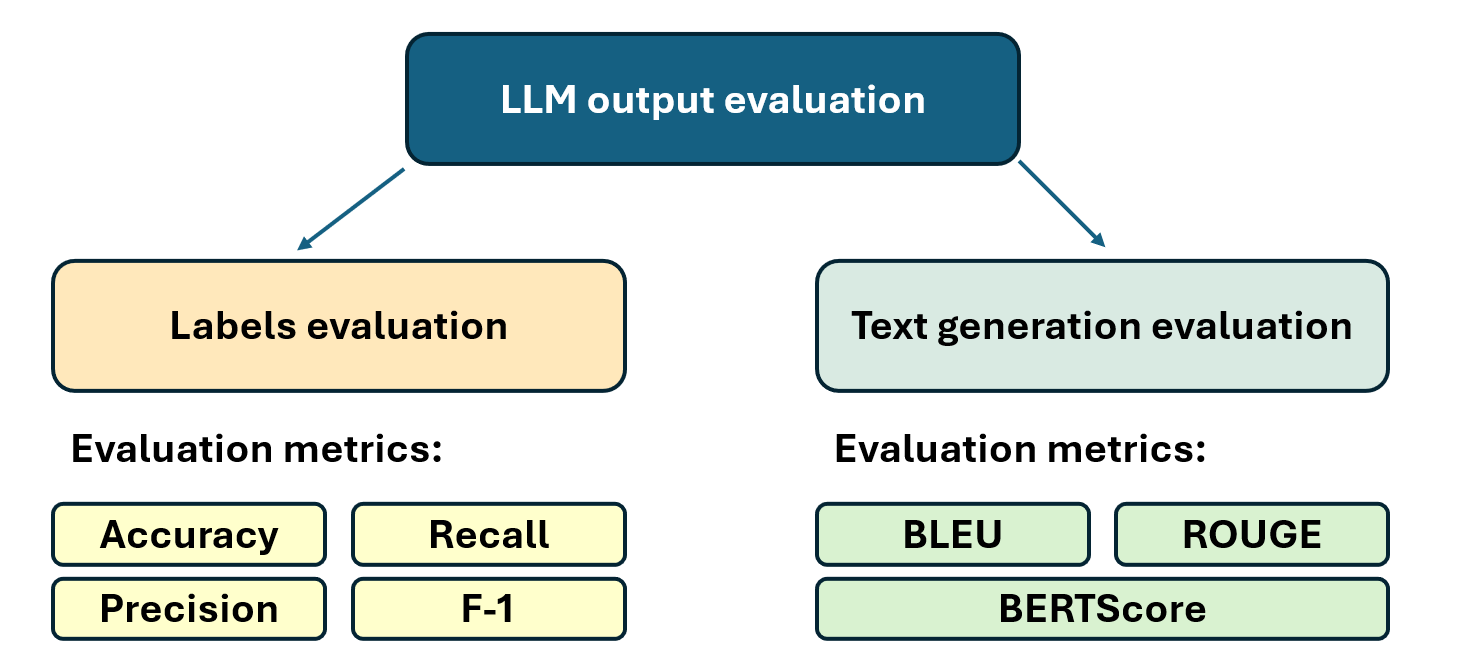


---

## Table of Contents

### Part 1: Classification and Label Evaluation
* **1.1 Theory:** Evaluation Metrics
* **1.2 Practical:** Dummy Data Simulation
* **1.3 Practical:** Phishing Detection use-case
---

### Part 2: Text Generation Evaluation
* **2.1 Theory:** Text Generation Evaluation Scoring Methods (BLEU, ROUGE, BERTScore)
* **2.2 Practical:** Text Analysis on Dummy Data

---

## Part 1: Classification and Label Evaluation
### 1.1 Theory: Evaluation Metrics. Output label evaluation technics. Confution matrix, key metrics calculation (accuracy, percision, recall, F1-Score)


#### Confusion Matrix

It compares **actual labels** with **predicted labels** and forms the basis for metrics like Accuracy, Precision, Recall, and F1-score. All these metrics are obtained from **confusion matrix**. 


##### Confusion Matrix Table

| Actual \ Predicted | Positive | Negative |
|--------------------|----------|----------|
| **Positive** | **True Positive (TP)** | **False Negative (FN)** |
| **Negative** | **False Positive (FP)** | **True Negative (TN)** |

##### Key Metrics Overview

| Metric | Formula | What it Means |
|------|--------|---------------|
| **Accuracy** | $\frac{TP + TN}{TP + TN + FP + FN}$ | Overall correctness of the model. |
| **Precision** | $\frac{TP}{TP + FP}$ | How reliable positive predictions are. |
| **Recall** | $\frac{TP}{TP + FN}$ | Ability to find all actual positive cases. |
| **F1-Score** | $2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$ | Balance between Precision and Recall. |

##### When to Use Each Metric

- **Accuracy** is useful when classes are well balanced.
- **Precision** is important when false positives are costly (e.g. flagging legitimate emails as spam).
- **Recall** matters when missing positives is costly (e.g. failing to detect harmful content).
- **F1-Score** is preferred when dealing with **imbalanced datasets** and when both Precision and Recall matter.



### 1.2 Practical: Dummy Data Simulation

In this part we look at described above metrics in action. We use Dummy example, which emulated AI Labeling of Phishing emails. We use dummy data to emulate AI performance for learning purpose. 

In [56]:
# Step 1: Install Required Packages (for Part 1) 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Dummy data to show calculation only

In [57]:
import pandas as pd
import random
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Create Dummy Data
data = {
    'Email_ID': range(1, 21),
    'Urgent_Language': [1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0],
    'Suspicious_Link': [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1],
    'Is_Phishing':      [1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1]
}
df = pd.DataFrame(data)

# 2. AI Emulation Logic
# We emulate an AI that:
# - Almost always flags 'Urgent + Link' as Phishing (1)
# - Is unsure about emails with no markers (0), but occasionally guesses wrong.
def emulate_ai(row):
    # Logic: If both markers exist, 90% chance it says Phishing
    if row['Urgent_Language'] == 1 and row['Suspicious_Link'] == 1:
        return random.choices([1, 0], weights=[90, 10])[0]
    # Logic: If no markers exist, 80% chance it says Safe
    elif row['Urgent_Language'] == 0 and row['Suspicious_Link'] == 0:
        return random.choices([1, 0], weights=[20, 80])[0]
    # Otherwise, it's a 50/50 toss-up
    else:
        return random.randint(0, 1)

# Apply the emulation
random.seed(42) # For reproducible "random" results
df['AI_Prediction'] = df.apply(emulate_ai, axis=1)

# 3. Calculate Metrics
y_true = df['Is_Phishing']
y_pred = df['AI_Prediction']

print("--- AI Phishing Emulation Performance ---")
print(f"Accuracy:  {accuracy_score(y_true, y_pred):.2f}")
print(f"Precision: {precision_score(y_true, y_pred):.2f}")
print(f"Recall:    {recall_score(y_true, y_pred):.2f}") # Guaranteed to vary from 1.0
print(f"F1 Score:  {f1_score(y_true, y_pred):.2f}")

# 4. Identify Errors
df['Result'] = df.apply(
    lambda x: 'Correct' if x['Is_Phishing'] == x['AI_Prediction']
    else ('False Negative (Missed Attack)' if x['Is_Phishing'] == 1 else 'False Positive (User Annoyed)'), axis=1
)

print("\n--- Detailed Prediction Log ---")
print(df[['Email_ID', 'Is_Phishing', 'AI_Prediction', 'Result']].head(10))

--- AI Phishing Emulation Performance ---
Accuracy:  0.50
Precision: 0.64
Recall:    0.54
F1 Score:  0.58

--- Detailed Prediction Log ---
   Email_ID  Is_Phishing  AI_Prediction                          Result
0         1            1              1                         Correct
1         2            1              0  False Negative (Missed Attack)
2         3            0              1   False Positive (User Annoyed)
3         4            1              0  False Negative (Missed Attack)
4         5            1              0  False Negative (Missed Attack)
5         6            0              0                         Correct
6         7            1              1                         Correct
7         8            1              0  False Negative (Missed Attack)
8         9            1              0  False Negative (Missed Attack)
9        10            0              1   False Positive (User Annoyed)


##### 📊 Model Performance Summary

The model currently achieves **low accuracy** and **poor recall (0.54)**, meaning it misses nearly half of the phishing attempts. This poses a serious risk in security-critical applications.



* **Low Recall:** Missing an attack is more dangerous than raising a false alarm.
* **Moderate Precision:** Frequent false positives cause "filter fatigue" for users.
* **Verdict:** The model is currently **unsafe** due to its high rate of missed threats.

---
##### 🔧 Recommended Improvements

To improve real-world effectiveness:

* **Increase Recall:** Prioritize catching attacks even if precision decreases slightly.
* **Adjust Threshold:** Change the decision boundary to flag suspicious emails more aggressively.
* **Metric Focus:** Optimize explicitly for **Recall** or **F1-score** rather than simple Accuracy.

---


### **1.3 Practical:** Phishing Detection use-case Kaggle and GPT Integration  [Requires API key]
AI test Examle (REQUIRES OpenAI - API KEY + Data from Phishing_Email.csv)

In [58]:
import pandas as pd
import numpy as np
import json
from openai import OpenAI
from concurrent.futures import ThreadPoolExecutor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- OpenAI connection SETUP ---
# Input your OpenAI API link below: 
client = OpenAI(api_key='!!!YOUR OPEN AI KEY HERE!!!')

In [59]:
### DATASET

# WE are using dataset from https://www.kaggle.com/datasets/subhajournal/phishingemails?resource=downloa
#Dataset contains data of email text and lables: phishing or not.

# 1. LOAD DATA
df = pd.read_csv("Phishing_Email.csv").dropna()
df['label'] = df['Email Type'].map({'Phishing Email': 1, 'Safe Email': 0})

# 2. CREATE BALANCED SAMPLE (50 Phishing, 50 Safe)
phishing_df = df[df['label'] == 1].sample(50, random_state=42)
safe_df = df[df['label'] == 0].sample(50, random_state=42)
balanced_df = pd.concat([phishing_df, safe_df]).sample(frac=1, random_state=42).reset_index(drop=True)


# Code below provides overview of the one email text:
# We'll pick the one containing "Congratulations" as it's a classic phishing example

try:
    example_email = balanced_df[
        (balanced_df['label'] == 1) & 
        (balanced_df['Email Text'].str.contains("Congratulations", case=False))
    ].iloc[0]

    print("="*60)
    print(f"FULL TEXT INSPECTION (Actual Label: {example_email['label']})")
    print("="*60)
    print(example_email['Email Text'])
    print("="*60)
    
except (IndexError, KeyError):
    
    # This triggers if no 'Congratulations' emails exist in your 100-row sample
    print("No email matching those criteria was found in this specific sample.")
    print("Showing the first available phishing email instead:")
    print("-" * 30)
    first_phish = balanced_df[balanced_df['label'] == 1].iloc[0]
    print(first_phish['Email Text'])

FULL TEXT INSPECTION (Actual Label: 1)
Congratulations, 
You Won $30 FreeToday At The Internet's Best & MostTrusted On-Line 
Casino!
To Collect Your 
$30 Cash Click Here!Â 
To Collect Your $30 Cash Click Here!
Â Â 
Â 
Â This message is sent in compliance of the new 
            e-mail bill:SECTION 301 Per Section 301, Paragraph (a)(2)(C) of 
            S. 1618,Further transmissions to you by the sender of this email 
            maybestopped at no cost to you by entering your email address 
            tothe form in this email and clicking submit to be 
            automatically   
                                    
                               removed. To be Removed from our 
            Opt-In mailing list. Please enter your email address in the provided 
            box below and click remove, thank you. 
      
Your 
                          E-mail Address Will Be Immediately Removed From All Mailing Lists



In [60]:
# --- DATASET INSPECTION: View a specific example ---
# Ensure we use the correct column name 'label' (matching Step 1)

In [61]:
### Model and prompt set up
def get_ai_analysis(text):
    """Calls AI to get both a label and a short reasoning."""
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                    {
                        "role": "system", 
                        "content": (
                            "You are a cynical fraud investigator. Classify as Phishing (1) or Safe (0). "
                            " Return ONLY a JSON object with "
                            "keys 'label' and 'reason'. The 'reason' MUST be 8 words or fewer."
                        )
                    },
                {"role": "user", "content": text[:700]}
            ],
            response_format={"type": "json_object"},
            temperature=0
        )
        content = json.loads(response.choices[0].message.content)
        return content.get('label'), content.get('reason')
    except Exception as e:
        return None, "Error"

# 3. RUN AI (Parallel)
print(f"Analyzing {len(balanced_df)} balanced emails...")
with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(get_ai_analysis, balanced_df['Email Text']))

# Separate results
balanced_df['ai_pred'], balanced_df['reasoning'] = zip(*results)

# 4. EVALUATION
balanced_df = balanced_df.dropna(subset=['ai_pred'])
y_true = balanced_df['label']
y_pred = balanced_df['ai_pred'].astype(int)

# 5. FINAL STATUS MESSAGE

print("✅ ANALYSIS FINISHED")


Analyzing 100 balanced emails...
✅ ANALYSIS FINISHED



FINAL PERFORMANCE METRICS
Accuracy:  95.00%
Recall:    94.00% (Security Safety)
Precision: 95.92% (User Trust)
F1-Score:  94.95% (Balanced Metric)


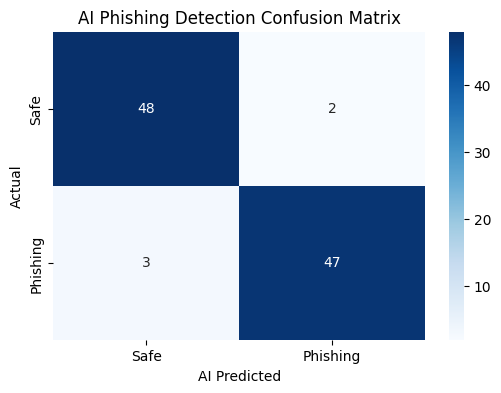

In [63]:
# --- STATS ---
print("\n" + "="*40)
print("FINAL PERFORMANCE METRICS")
print("="*40)
print(f"Accuracy:  {accuracy_score(y_true, y_pred):.2%}")
print(f"Recall:    {recall_score(y_true, y_pred):.2%} (Security Safety)")
print(f"Precision: {precision_score(y_true, y_pred):.2%} (User Trust)")
print(f"F1-Score:  {f1_score(y_true, y_pred):.2%} (Balanced Metric)")
print("="*40)


# 5. GENERATE CONFUSION MATRIX
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Safe', 'Phishing'], 
            yticklabels=['Safe', 'Phishing'])
plt.ylabel('Actual')
plt.xlabel('AI Predicted')
plt.title('AI Phishing Detection Confusion Matrix')
plt.show()


## Output preview (if you do not have Open AI link): 
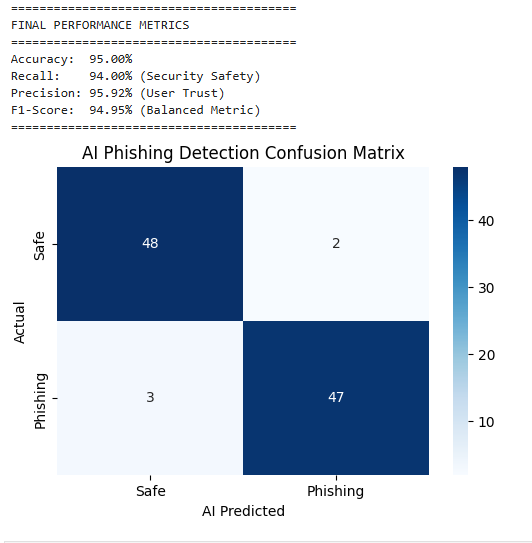

---

# Part 2: Text Generation Evaluation 
## IF the data from clasic quantitative metrics focus on the correct labeling, when it comes to generative part, there are couple of classic models that we will explain next: 

### 2.1 Theory: 2.2 Practical: Text Analysis on Dummy Data  Generation output Scoring Methods

When assessing how an AI model performs across different language tasks, specific metrics are used to measure quality, accuracy, and meaning. Below is a breakdown of the most common evaluation frameworks:

---

##### **1. BLEU (Bilingual Evaluation Understudy)**
* **Primary Use Case:** Machine Translation (e.g., Google Translate).
* **Focus:** **Precision.** * **Mechanism:** It checks for **word-for-word overlap** between the model output and reference text to see if the model reused the correct vocabulary.

##### **2. ROUGE (Recall-Oriented Understudy for Gisting Evaluation)**
* **Primary Use Case:** News Summarization or meeting notes.
* **Focus:** **Recall focused.**
* **Mechanism:** It evaluates how well the model captured the **"key ideas"** and main points of a longer text.


##### **3. BERTScore**
* **Primary Use Case:** AI Chatbots and Question Answering.
* **Focus:** **Semantic Meaning.**
* **Mechanism:** It uses **embeddings** to see if the model conveys the same underlying meaning, even with different wording.



---

##### **🚀 Summary Comparison Table**

| Metric | Best For... | Focus | Key Strength |
| :--- | :--- | :--- | :--- |
| **BLEU** | Translation | Precision | High accuracy for exact vocabulary matches. |
| **ROUGE** | Summarization | Recall | Ensures key ideas and main points are captured. |
| **BERTScore** | Chatbots | Meaning | Uses embeddings for deep semantic alignment. |

---

## 2.2 Practical: Abstractive Summarization  

In this example we compare Human like example (expected good answer) to emulated answers from AI models. 

In [64]:
#Step 0: Download necessary NLTK data

import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import rouge_score
from rouge_score import rouge_scorer

### LLM Output Emulation

**Prompt:** *Summarize the text into three concise sentences. Ensure the summary captures the main event, the cause, and the expected outcome!*

**Source Article:** [U.S. Fed leaves rates unchanged, sees ‘elevated’ inflation and stabilizing job market (BNN Bloomberg)](https://www.bnnbloomberg.ca/business/2026/01/28/fed-expected-to-hold-rates-steady-as-rate-cut-pause-begins/)

In [65]:
## 📝 Step 1: Define Your Reference and Candidate Summaries
# Reference summary ( Ground Truth (how you want your model to answer))

reference_summary = (
    "The Federal Reserve voted 10-2 to hold interest rates steady at a range of 3.50%-3.75%, "
    "pausing its easing cycle after three consecutive cuts. Chair Jerome Powell cited 'solid' "
    "economic growth but noted inflation remains 'somewhat elevated'. Governors Christopher Waller "
    "and Stephen Miran dissented in favor of a quarter-point cut. Despite the pause, the S&P 500 "
    "closed at a record high as markets anticipate further cuts later in the year."
)

# Candidate A (weak model)
candidate_A = "The Fed decided to lower interest rates again to help the economy. \
    Jerome Powell said inflation is gone and the job market is weak, so they cut rates by 50 basis points. \
    The vote was unanimous, and everyone agreed it was time to stop raising rates."

# Candidate B (average Model)
candidate_B = "The Federal Reserve kept interest rates the same on Wednesday. \
Chair Powell said the economy is doing well but inflation is still a bit high. \
Most officials agreed with the decision, though a couple of them wanted to lower rates instead. \
The stock market reacted positively to the news."

# Candidate C (strong model)
candidate_C = "The Fed voted 10-2 to maintain the target rate at 3.50%-3.75%, ending a streak of three straight cuts. \
While Chair Powell pointed to solid growth, Governors Waller and Miran dissented, preferring a 25-basis-point reduction. \
Stocks rallied, with the S&P 500 hitting a record high as investors looked past the pause."

# Candidate D (The ground truth)
candidate_D = reference_summary  # This one matches perfectly

candidates = [candidate_A, candidate_B, candidate_C, candidate_D]

### 🔍 Step 2: Calculating the BLEU Score with NLTK


In [66]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

reference_tokens = [reference_summary.lower().split()]
chencherry = SmoothingFunction()

for i, candidate in enumerate(candidates, start=1):
    tokens = candidate.lower().split()
    score = sentence_bleu(reference_tokens, tokens, 
                          weights=(0.25, 0.25, 0.25, 0.25),  # BLEU-4
                          smoothing_function=chencherry.method1)
    print(f"Candidate {chr(64+i)} BLEU Score: {score:.4f}")


Candidate A BLEU Score: 0.0093
Candidate B BLEU Score: 0.0207
Candidate C BLEU Score: 0.0757
Candidate D BLEU Score: 1.0000


### Model Evaluation Summary: BLEU Score Comparison

The following table summarizes the performance of four candidate models against the provided **Reference Summary** (Ground Truth). The **BLEU (Bilingual Evaluation Understudy)** metric was used to quantify the $n$-gram overlap.

####  Performance Results

| Candidate | Model Quality | BLEU Score | Notes |
| :--- | :--- | :--- | :--- |
| **Candidate D** | **Ground Truth** | **1.0000** | Perfect match; identical to the reference. |
| **Candidate C** | **Strong** | **0.0757** | Highest similarity among non-identical models; captures key entities and specific numbers. |
| **Candidate B** | **Average** | **0.0207** | Captures the general sentiment but lacks specific terminology overlap. |
| **Candidate A** | **Weak** | **0.0093** | Lowest score; contains factual inaccuracies and very little shared vocabulary. |

---


### 🔍 Step 3: Calculating ROUGE Score with rouge-score

ROUGE evaluates how much of the reference content is “recalled” in the candidate.
We’ll use rouge1, rouge2, and rougeL with stemming to match word variants.

#### ROUGE Evaluation Analysis

ROUGE (Recall-Oriented Understudy for Gisting Evaluation) measures the overlap between a machine-generated summary and a human reference.

* **ROUGE-1 (Unigrams):** Measures the overlap of individual words. It indicates the "content coverage" or whether the same vocabulary is being used.
* **ROUGE-2 (Bigrams):** Measures the overlap of pairs of consecutive words. This is a better indicator of "fluency" and local phrasing than ROUGE-1.
* **ROUGE-L (Longest Common Subsequence):** Identifies the longest shared sequence of words. Unlike N-grams, it doesn't require consecutive matches, making it great at capturing the overall "sentence structure" and flow.


In [67]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

for i, candidate in enumerate(candidates, start=1):
    print(f"\nCandidate {chr(64+i)} ROUGE Scores:")
    scores = scorer.score(reference_summary.lower(), candidate.lower())
    for key, value in scores.items():
        print(f"  {key}: P={value.precision:.4f}, R={value.recall:.4f}, F1={value.fmeasure:.4f}")


Candidate A ROUGE Scores:
  rouge1: P=0.3478, R=0.2133, F1=0.2645
  rouge2: P=0.0444, R=0.0270, F1=0.0336
  rougeL: P=0.2609, R=0.1600, F1=0.1983

Candidate B ROUGE Scores:
  rouge1: P=0.3673, R=0.2400, F1=0.2903
  rouge2: P=0.0625, R=0.0405, F1=0.0492
  rougeL: P=0.2857, R=0.1867, F1=0.2258

Candidate C ROUGE Scores:
  rouge1: P=0.6491, R=0.4933, F1=0.5606
  rouge2: P=0.2679, R=0.2027, F1=0.2308
  rougeL: P=0.5789, R=0.4400, F1=0.5000

Candidate D ROUGE Scores:
  rouge1: P=1.0000, R=1.0000, F1=1.0000
  rouge2: P=1.0000, R=1.0000, F1=1.0000
  rougeL: P=1.0000, R=1.0000, F1=1.0000



--- 

### Model Evaluation Summary: ROUGE Score Comparison

The following table summarizes the **ROUGE (Recall-Oriented Understudy for Gisting Evaluation)** results for the four candidate summaries. Unlike BLEU, which focuses on precision, ROUGE metrics emphasize **recall**—how much of the reference summary the model managed to capture.

####  Performance Results (F1-Scores)

| Candidate | Performance | ROUGE-1 (Unigrams) | ROUGE-2 (Bigrams) | ROUGE-L (Longest Sequence) |
| :--- | :--- | :--- | :--- | :--- |
| **Candidate D** | **Ground Truth** | **1.0000** | **1.0000** | **1.0000** |
| **Candidate C** | **Strong** | **0.5606** | **0.2308** | **0.5000** |
| **Candidate B** | **Average** | **0.2903** | **0.0492** | **0.2258** |
| **Candidate A** | **Weak** | **0.2645** | **0.0336** | **0.1983** |

---

#### Key Insights

* **Higher Interpretability:** Notice how Candidate C's ROUGE-1 score ($0.5606$) is much higher than its BLEU score ($0.0757$). This is because ROUGE recognizes that the model captured many of the correct individual words, even if the exact multi-word sequences didn't match perfectly.
* **ROUGE-2 (The Quality Indicator):** There is a massive jump in ROUGE-2 scores between Candidate B ($0.0492$) and Candidate C ($0.2308$). This confirms that Candidate C is significantly better at reproducing specific phrases and technical details (like "3.50%-3.75%") compared to the "Average" model.
* **ROUGE-L (Fluency):** The ROUGE-L score of **0.5000** for Candidate C suggests that it effectively preserves the sentence structure and logical flow of the original reference summary.
---

### 🔍 Step 4: Optional – Semantic Evaluation with BERTScore

Unlike BLEU and ROUGE, BERTScore uses embeddings to check semantic similarity.
This means it recognizes similar meaning, even with different wording.

In [68]:
from transformers import logging
logging.set_verbosity_error()

from bert_score import score

for i, candidate in enumerate(candidates, start=1):
    P, R, F1 = score(
        [candidate],
        [reference_summary],
        lang="en",
        verbose=False
    )
    print(f"Candidate {chr(64+i)} BERTScore F1: {F1[0]:.4f}")


Candidate A BERTScore F1: 0.8567
Candidate B BERTScore F1: 0.8765
Candidate C BERTScore F1: 0.9226
Candidate D BERTScore F1: 1.0000


### Model Evaluation Summary: BERTScore Comparison

This final evaluation uses **BERTScore**, which leverages contextual embeddings to measure semantic similarity rather than just exact word matching. This provides a more "human-like" assessment of how well the candidates captured the meaning of the reference summary.

####  Performance Results (F1-Scores)

| Candidate | Performance Level | BERTScore F1 | Analysis |
| :--- | :--- | :--- | :--- |
| **Candidate D** | **Ground Truth** | **1.0000** | Perfect semantic and structural match. |
| **Candidate C** | **Strong Model** | **0.9226** | Excellent semantic alignment; captures almost all core meaning. |
| **Candidate B** | **Average Model** | **0.8765** | Solid understanding of the topic, though phrasing is more generic. |
| **Candidate A** | **Weak Model** | **0.8567** | Lowest score, but notably high compared to BLEU/ROUGE. |

---

####  Key Insights

* **Semantic Nuance:** Unlike BLEU or ROUGE, BERTScore shows that even the "Weak" model (Candidate A) has a high base score ($0.8567$). This is because the model recognizes that the candidate is talking about the same general topic (finance/the Fed), even if the specific facts are wrong.
* **The Stability of Meaning:** The narrow gap between Candidate B ($0.8765$) and Candidate C ($0.9226$) suggests that while Candidate C is more precise with numbers and names, both models occupy a similar "conceptual space".
* **Contextual Embeddings:** BERTScore is often preferred for summarization because it doesn't penalize synonyms. For example, if a model said "The Fed *maintained* rates" instead of "The Fed *held* rates," BERTScore would treat them as nearly identical.

---

## Hand-ON example. Evaluate your own output to the question and compare to AI

In [69]:
#Write your own summarization of this article and compare to LLM output: 
#https://www.bnnbloomberg.ca/business/2026/01/28/fed-expected-to-hold-rates-steady-as-rate-cut-pause-begins/

your_candidate = "!!!!HERE SHOULD BE YOUR INPUT!!!!"

# BLEU
tokens = your_candidate.lower().split()
bleu = sentence_bleu(reference_tokens, tokens, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=chencherry.method1)
print(f"Your BLEU: {bleu:.4f}")

# ROUGE
rouge = scorer.score(reference_summary.lower(), your_candidate.lower())
for key, value in rouge.items():
    print(f"Your {key}: P={value.precision:.4f}, R={value.recall:.4f}, F1={value.fmeasure:.4f}")

# BERTScore
P, R, F1 = score(
    [your_candidate], 
    [reference_summary], 
    lang="en", 
    verbose=False
)

# Access index [0] and use .item() to get the clean float value
print(f"Your BERTScore F1: {F1[0].item():.4f}")

Your BLEU: 0.0000
Your rouge1: P=0.0000, R=0.0000, F1=0.0000
Your rouge2: P=0.0000, R=0.0000, F1=0.0000
Your rougeL: P=0.0000, R=0.0000, F1=0.0000
Your BERTScore F1: 0.7742


### Next Evaluation Methods to Look At (in development)

---
#### 1. Evaluation of RAG Pipelines
#### 2. Benchmark-Based Evaluation
#### 3. Judgment-Based Evaluation
